In [13]:
import os
os.chdir(r'E:\PYTHON\Data')

In [19]:
import matplotlib.pyplot as plt

In [1]:
URL = 'https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json'

In [2]:
# Imports
import requests
import pandas as pd

# Download data from URL
res = requests.get(URL)

# Convert the result
data_temp = res.json()
print(data_temp)

# Convert json data to Dataframe
df_temp = pd.DataFrame(data_temp)

print(df_temp.head())

[{'timestamp': 1535764800000, 'value': 15.8}, {'timestamp': 1535765400000, 'value': 15.7}, {'timestamp': 1535766000000, 'value': 15.7}, {'timestamp': 1535766600000, 'value': 15.6}, {'timestamp': 1535767200000, 'value': 15.7}, {'timestamp': 1535767800000, 'value': 15.7}, {'timestamp': 1535768400000, 'value': 15.8}, {'timestamp': 1535769000000, 'value': 15.7}, {'timestamp': 1535769600000, 'value': 15.9}, {'timestamp': 1535770200000, 'value': 15.7}, {'timestamp': 1535770800000, 'value': 15.6}, {'timestamp': 1535771400000, 'value': 15.4}, {'timestamp': 1535772000000, 'value': 15.4}, {'timestamp': 1535772600000, 'value': 15.2}, {'timestamp': 1535773200000, 'value': 14.6}, {'timestamp': 1535773800000, 'value': 14.5}, {'timestamp': 1535774400000, 'value': 14.4}, {'timestamp': 1535775000000, 'value': 14.2}, {'timestamp': 1535775600000, 'value': 14.2}, {'timestamp': 1535776200000, 'value': 14.2}, {'timestamp': 1535776800000, 'value': 14.2}, {'timestamp': 1535777400000, 'value': 14.1}, {'timesta

In [3]:
# Import pandas
import pandas as pd

# Load URL to Dataframe
df_temp = pd.read_json(URL)

# Print first 5 rows
print(df_temp.head())

# Print datatypes
print(df_temp.dtypes)

            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7
timestamp    datetime64[ns]
value               float64
dtype: object


In [4]:
# Import pandas
import pandas as pd

# Load URL to Dataframe
df_temp = pd.read_json(URL)

# Save dataframe as json
df_temp.to_json("temperature.json", orient='records')

# Save dataframe as csv
df_temp.to_csv("temperature.csv", index=False)

In [6]:
import pandas as pd

# Read file
df_env = pd.read_csv("temperature.csv", parse_dates=['timestamp'])

# Print head
print(df_env.head())

# Print dataframe info
print(df_env.info())

            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
timestamp    30 non-null datetime64[ns]
value        30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes
None


In [7]:
import pandas as pd

# Read file
df_env = pd.read_json("temperature.json")

# Print head
print(df_env.head())

# Print dataframe info
print(df_env.info())

            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
timestamp    30 non-null datetime64[ns]
value        30 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 560.0 bytes
None


In [8]:
import pandas as pd

# Read file from json
df_env = pd.read_json("temperature.json")

# Print summary statistics
print(df_env.describe())

           value
count  30.000000
mean   14.873333
std     0.745068
min    14.000000
25%    14.200000
50%    14.550000
75%    15.700000
max    15.900000


Save Datastream
You will now take an MQTT Data stream and append each new data point to the list store.

Using the library paho.mqtt, you can subscribe to a data stream using subscribe.callback().

Each new message will result in one call to our function, which is required to have the following arguments:

client, the client instance for this callback
userdata, the private user data set when creating the instance
message, an instance of MQTTMessage. For this exercise, payload is the only attribute we're interested in.
You need to parse the data as JSON string using json.loads() and append it the list store. You'll then convert this to a DataFrame and store the DataFrame as CSV file.

json, pandas as pd, MQTT_HOST and topic are available in your session.

In [ ]:
topic = 'paho/test/iot_course'
MQTT_HOST = 'testmqtt.datacamp.com'

In [14]:
df = pd.read_json(r'environment.json')

In [22]:
df.dropna(inplace=True)

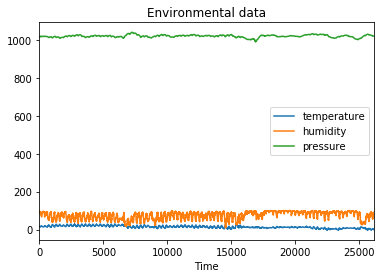

In [23]:
cols = ["temperature", "humidity", "pressure"]

# Create a line plot
df[cols].plot(title="Environmental data")

# Label X-Axis
plt.xlabel("Time")

# Show plot
plt.show()

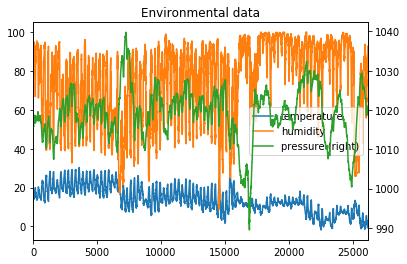

In [24]:
cols = ["temperature", "humidity", "pressure"]

# Create a line plot
df[cols].plot(title="Environmental data",
              secondary_y="pressure")

# Label X-Axis
plt.xlabel("Time")

# Show plot
plt.show()

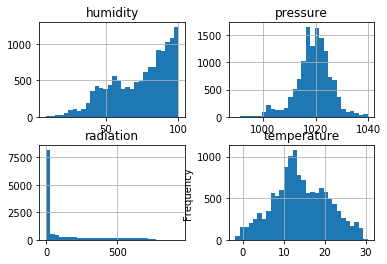

In [26]:
cols = ["temperature", "humidity", "pressure", "radiation"]

# Create a histogram
df[cols].hist(bins=30)

# Label Y-Axis
plt.ylabel("Frequency")

# Show plot
plt.show()

In [36]:
data = pd.read_json(r'environment.json')
# Print head of the DataFrame
print(data.head())

# Drop missing rows
data = data.dropna()
print(data.head())

   humidity  precipitation  pressure  radiation  sunshine  temperature  \
0      95.6            0.0    1016.3        0.0     599.2         16.1   
1       NaN            0.1       NaN        NaN       NaN          NaN   
2      95.5            0.0    1016.4        0.0     600.0         16.1   
3       NaN            0.0       NaN        NaN       NaN          NaN   
4      95.2            0.0    1016.5        0.0     598.9         16.1   

            timestamp  
0 2018-09-01 00:00:00  
1 2018-09-01 00:05:00  
2 2018-09-01 00:10:00  
3 2018-09-01 00:15:00  
4 2018-09-01 00:20:00  
   humidity  precipitation  pressure  radiation  sunshine  temperature  \
0      95.6            0.0    1016.3        0.0     599.2         16.1   
2      95.5            0.0    1016.4        0.0     600.0         16.1   
4      95.2            0.0    1016.5        0.0     598.9         16.1   
6      95.1            0.0    1016.4        0.0     600.0         16.1   
8      95.3            0.0    1016.3     

In [39]:
data = pd.read_json(r'environment.json')
# Print head of the DataFrame
print(data.head())

# Forward-fill missing values
data_clean = data.fillna(method = 'ffill')
print(data_clean.head())

   humidity  precipitation  pressure  radiation  sunshine  temperature  \
0      95.6            0.0    1016.3        0.0     599.2         16.1   
1       NaN            0.1       NaN        NaN       NaN          NaN   
2      95.5            0.0    1016.4        0.0     600.0         16.1   
3       NaN            0.0       NaN        NaN       NaN          NaN   
4      95.2            0.0    1016.5        0.0     598.9         16.1   

            timestamp  
0 2018-09-01 00:00:00  
1 2018-09-01 00:05:00  
2 2018-09-01 00:10:00  
3 2018-09-01 00:15:00  
4 2018-09-01 00:20:00  
   humidity  precipitation  pressure  radiation  sunshine  temperature  \
0      95.6            0.0    1016.3        0.0     599.2         16.1   
1      95.6            0.1    1016.3        0.0     599.2         16.1   
2      95.5            0.0    1016.4        0.0     600.0         16.1   
3      95.5            0.0    1016.4        0.0     600.0         16.1   
4      95.2            0.0    1016.5     

In [41]:
data = data.fillna(method = 'ffill')
# Calculate and print NA count
print(data.isna().sum())

humidity         0
precipitation    0
pressure         0
radiation        0
sunshine         0
temperature      0
timestamp        0
dtype: int64


In [45]:
data = pd.read_json(r'environment.json')
data.set_index('timestamp',inplace=True)
data = data.fillna(method = 'ffill')
# Calculate and print NA count
print(data.isna().sum())

# Resample data
data_res = data.resample("10min").last()

# Calculate and print NA count
print(data_res.isna().sum())

humidity         0
precipitation    0
pressure         0
radiation        0
sunshine         0
temperature      0
dtype: int64
humidity         5
precipitation    5
pressure         5
radiation        5
sunshine         5
temperature      5
dtype: int64


humidity         0
precipitation    0
pressure         0
radiation        0
sunshine         0
temperature      0
dtype: int64
humidity         5
precipitation    5
pressure         5
radiation        5
sunshine         5
temperature      5
dtype: int64


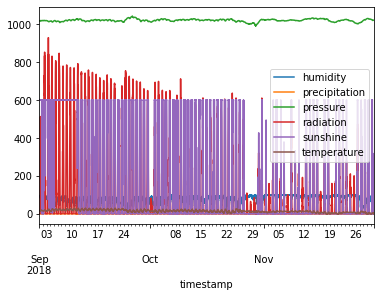

In [46]:
# Calculate and print NA count
print(data.isna().sum())

# Resample data
data_res = data.resample("10min").last()

# Calculate and print NA count
print(data_res.isna().sum())

# Plot the dataframe
data_res.plot()

plt.show()

In [49]:
data.columns

Index(['humidity', 'precipitation', 'pressure', 'radiation', 'sunshine',
       'temperature'],
      dtype='object')

In [54]:
temperature = data.temperature
humidity = data.humidity

In [55]:
# Rename the columns
temperature.columns = ['temperature']
humidity.columns = ['humidity']

# Create list of dataframes
df_list = [temperature,humidity]

# Concatenate files
environment = pd.concat(df_list, axis=1)

# Print dataframe
print(environment.head())

                     temperature  humidity
timestamp                                 
2018-09-01 00:00:00         16.1      95.6
2018-09-01 00:05:00         16.1      95.6
2018-09-01 00:10:00         16.1      95.5
2018-09-01 00:15:00         16.1      95.5
2018-09-01 00:20:00         16.1      95.2
